In [9]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

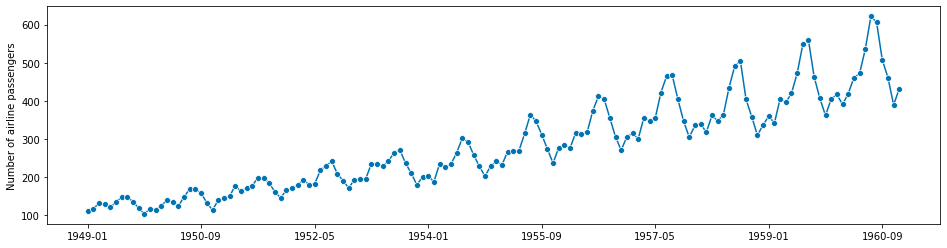

In [10]:
y = get_data('airline', verbose=False)
plot_series(y)

In [11]:
fh = np.arange(1,13)
fold = 3

# Available Models

In [12]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12)
exp.models()

,Description,Value
0,session_id,8816
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


# Tests

In [13]:
exp.test_model()

value
Test         Test Name  Property            Setting              
Summary      Statistics Length                              144.0
                        Mean                           280.298611
                        Median                              265.5
                        Standard Deviation             119.966317
                        Variance                     14391.917201
                        Kurtosis                        -0.364942
                        Skewness                          0.58316
                        # Distinct Values                   118.0
White Noise  Ljung-Box  Test Statictic      24        1606.083817
                                            48        1933.155822
                        p-value             24                0.0
                                            48                0.0
                        White Noise         24              False
                                            48              False
Stationarity ADF        Stationarity        0.05            False
                        p-value             0.05          0.99188
                        Test Statistic      0.05         0.815369
                        Critical Value 1%   0.05        -3.481682
                        Critical Value 5%   0.05        -2.884042
                        Critical Value 10%  0.05         -2.57877
             KPSS       Trend Stationarity  0.05             True
                        p-value             0.05              0.1
                        Test Statistic      0.05          0.09615
                        Critical Value 10%  0.05            0.119
                        Critical Value 5%   0.05            0.146
                        Critical Value 2.5% 0.05            0.176
                        Critical Value 1%   0.05            0.216
Normality    Shapiro    Normality           0.05            False
                        p-value             0.05         0.000068

In [14]:
# Options are: 'all', 'stat_summary', 'white_noise' 'stationarity', 'adf', 'kpss', 'normality'
# Setting denotes alpha value used (for most tests). For white noise, it denotes the lags used to test
exp.test_model(test='stationarity')

value
Test         Test Name Property            Setting          
Stationarity ADF       Stationarity        0.05        False
                       p-value             0.05      0.99188
                       Test Statistic      0.05     0.815369
                       Critical Value 1%   0.05    -3.481682
                       Critical Value 5%   0.05    -2.884042
                       Critical Value 10%  0.05     -2.57877
             KPSS      Trend Stationarity  0.05         True
                       p-value             0.05          0.1
                       Test Statistic      0.05      0.09615
                       Critical Value 10%  0.05        0.119
                       Critical Value 5%   0.05        0.146
                       Critical Value 2.5% 0.05        0.176
                       Critical Value 1%   0.05        0.216

In [15]:
# For white noise, Setting it denotes the lags used to test
exp.test_model(test='white_noise')

value
Test        Test Name Property       Setting             
White Noise Ljung-Box Test Statictic 24       1606.083817
                                     48       1933.155822
                      p-value        24               0.0
                                     48               0.0
                      White Noise    24             False
                                     48             False

In [16]:
# You can change alpha if needed (would not recommend though)
exp.test_model(test='stationarity', alpha = 0.2)

value
Test         Test Name Property            Setting          
Stationarity ADF       Stationarity        0.2         False
                       p-value             0.2       0.99188
                       Test Statistic      0.2      0.815369
                       Critical Value 1%   0.2     -3.481682
                       Critical Value 5%   0.2     -2.884042
                       Critical Value 10%  0.2      -2.57877
             KPSS      Trend Stationarity  0.2         False
                       p-value             0.2           0.1
                       Test Statistic      0.2       0.09615
                       Critical Value 10%  0.2         0.119
                       Critical Value 5%   0.2         0.146
                       Critical Value 2.5% 0.2         0.176
                       Critical Value 1%   0.2         0.216

# Flow example

## Common Setup

In [17]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [18]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.get_config("y_test")

## Manual Create

### Classical Statistical Models

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.7395,317.0161,0.0347,0.0355,0.8968
1,1957-12,24.6241,730.8699,0.0684,0.0656,0.8085
2,1958-12,20.8190,550.1234,0.0480,0.0494,0.8769
Mean,NaT,19.7275,532.6698,0.0503,0.0502,0.8608
SD,NaT,4.5101,169.4052,0.0138,0.0123,0.0378


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,13.3808,16.9801,0.0280,0.0280,0.9480


0.028

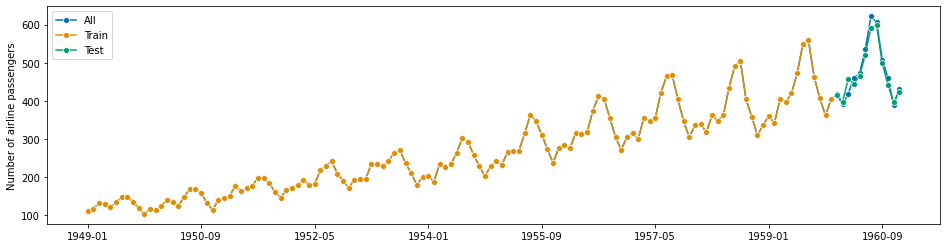

In [19]:
model = exp.create_model("exp_smooth")
y_predict = exp.predict_model(model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_predict, y_test), 4)

In [20]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.7395,317.0161,0.0347,0.0355,0.8968
1,1957-12,24.6241,730.8699,0.0684,0.0656,0.8085
2,1958-12,20.8190,550.1234,0.0480,0.0494,0.8769
Mean,NaT,19.7275,532.6698,0.0503,0.0502,0.8608
SD,NaT,4.5101,169.4052,0.0138,0.0123,0.0378


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=False)


In [21]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.7395,317.0161,0.0347,0.0355,0.8968
1,1957-12,24.6241,730.8699,0.0684,0.0656,0.8085
2,1958-12,20.8190,550.1234,0.0480,0.0494,0.8769
Mean,NaT,19.7275,532.6698,0.0503,0.0502,0.8608
SD,NaT,4.5101,169.4052,0.0138,0.0123,0.0378


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=False)


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,13.3808,16.9801,0.0280,0.0280,0.9480


0.028

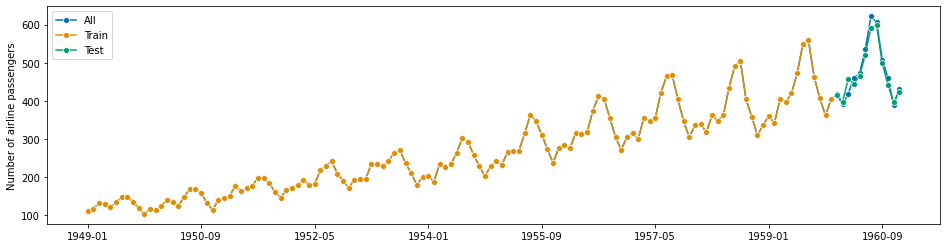

In [22]:
y_predict = exp.predict_model(tuned_model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_predict, y_test), 4)

In [23]:

# Random Grid Search with different number of iterations
tuned_model = exp.tune_model(model, search_algorithm="random", n_iter=5)
print(model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.7395,317.0161,0.0347,0.0355,0.8968
1,1957-12,24.6241,730.8699,0.0684,0.0656,0.8085
2,1958-12,20.8190,550.1234,0.0480,0.0494,0.8769
Mean,NaT,19.7275,532.6698,0.0503,0.0502,0.8608
SD,NaT,4.5101,169.4052,0.0138,0.0123,0.0378


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=False)


### Reduced Regressors: Random Forest (with internal conditional deseasonalize and detrending)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,28.0638,1611.5346,0.0678,0.0721,0.4754
1,1957-12,29.7063,1450.1777,0.0738,0.0748,0.6201
2,1958-12,22.8056,1290.5687,0.0470,0.0493,0.7113
Mean,NaT,26.8586,1450.7603,0.0629,0.0654,0.6023
SD,NaT,2.9433,131.0344,0.0115,0.0115,0.0971


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,RandomForestRegressor,32.1796,46.0571,0.0606,0.0637,0.6171


0.0637

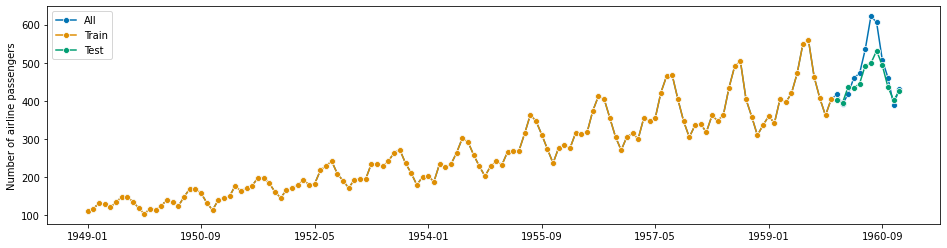

In [24]:
model = exp.create_model("rf_cds_dt")
y_predict = exp.predict_model(model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_predict, y_test), 4)

In [25]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,28.7546,1407.4569,0.0714,0.0750,0.5419
1,1957-12,26.7678,1048.6792,0.0690,0.0682,0.7253
2,1958-12,29.3616,1535.1337,0.0637,0.0657,0.6566
Mean,NaT,28.2947,1330.4233,0.0681,0.0696,0.6412
SD,NaT,1.1077,205.9290,0.0032,0.0039,0.0757


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=Rand

In [26]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,28.7546,1407.4569,0.0714,0.0750,0.5419
1,1957-12,26.7678,1048.6792,0.0690,0.0682,0.7253
2,1958-12,29.3616,1535.1337,0.0637,0.0657,0.6566
Mean,NaT,28.2947,1330.4233,0.0681,0.0696,0.6412
SD,NaT,1.1077,205.9290,0.0032,0.0039,0.0757


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=Rand

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,RandomForestRegressor,34.5229,46.0020,0.0668,0.0696,0.6180


0.0696

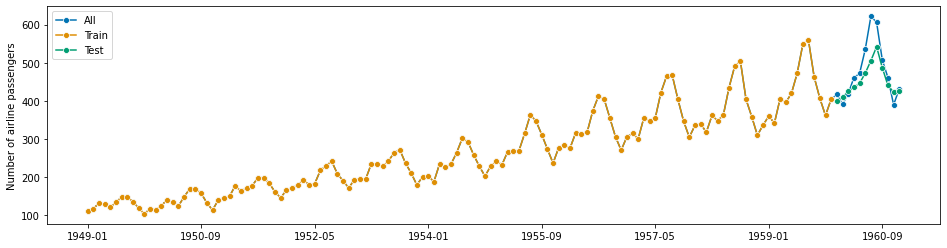

In [27]:
y_predict = exp.predict_model(tuned_model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_predict, y_test), 4)

## Auto Create

### Compare Models

In [28]:
best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,19.5889,529.3478,0.0498,0.0498,0.8624,0.2067
exp_smooth,Exponential Smoothing,19.7275,532.6698,0.0503,0.0502,0.8608,0.1267
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.8677,0.0467
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,0.8509,3.0633
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7169,0.5533
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,24.8102,1079.7144,0.0613,0.0631,0.6888,0.3100
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.6260,0.4567
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6023,0.5567
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.6015,0.0700
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,29.1314,1567.8077,0.0685,0.0715,0.5855,0.0400


[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, ignore_inf_ic=True,
         information_criterion='aic', initial_level=None, initial_seasonal=None,
         initial_trend=None, initialization_method='estimated', maxiter=1000,
         missing='none', n_jobs=None, restrict=True, return_params=False,
         seasonal='add', sp=12, start_params=None, trend='add'),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=None),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
      

In [29]:
compare_metrics = exp.pull()
compare_metrics

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,19.5889,529.3478,0.0498,0.0498,0.8624,0.2067
exp_smooth,Exponential Smoothing,19.7275,532.6698,0.0503,0.0502,0.8608,0.1267
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.8677,0.0467
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,0.8509,3.0633
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7169,0.5533
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonali...,24.8102,1079.7144,0.0613,0.0631,0.6888,0.3100
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.626,0.4567
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6023,0.5567
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.82,1437.6933,0.0661,0.0686,0.6015,0.0700
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,29.1314,1567.8077,0.0685,0.0715,0.5855,0.0400


* Note that some models like BATS and TBATS are disabled by default. 
* You can enable them by setting `turbo = False`

In [30]:
# _ = exp.compare_models(fold=fold, sort='smape', n_select=3, turbo=False)

### Tune Best Models

In [31]:
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
best_tuned_models

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.2626,277.8525,0.0331,0.0339,0.9096
1,1957-12,19.1686,455.3259,0.0530,0.0513,0.8807
2,1958-12,21.1925,551.0621,0.0491,0.0506,0.8767
Mean,NaT,17.8746,428.0802,0.0451,0.0453,0.8890
SD,NaT,3.3642,113.1890,0.0086,0.0080,0.0146


[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, ignore_inf_ic=True,
         information_criterion='aic', initial_level=None, initial_seasonal=None,
         initial_trend=None, initialization_method='estimated', maxiter=1000,
         missing='none', n_jobs=None, restrict=True, return_params=False,
         seasonal='add', sp=12, start_params=None, trend='add'),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=False),
 ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
     

### Blend Best Models

#### Mean Blender

In [32]:
mean_blender = exp.blend_models(best_tuned_models, method='mean')

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:51:23
Status,. . . . . . . . . . . . . . . . . .,Compiling Estimators
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MAE,RMSE,MAPE,SMAPE,R2


KeyError: 'ensemble_forecaster'

In [ ]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(mean_blender)
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_test[0], y[y_test.index]), 4)

#### Median Blender

In [33]:
median_blender = exp.blend_models(best_tuned_models, method='median')

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:51:23
Status,. . . . . . . . . . . . . . . . . .,Compiling Estimators
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MAE,RMSE,MAPE,SMAPE,R2


KeyError: 'ensemble_forecaster'

In [ ]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(median_blender)
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_test, y[y_test.index]), 4)

#### Voting Blender

In [ ]:
top_model_metrics = compare_metrics.iloc[0:3]['SMAPE']
display(top_model_metrics)

top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

In [ ]:
voting_blender = exp.blend_models(best_tuned_models, method='voting', weights=top_model_weights.values)

In [ ]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(voting_blender)
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(mean_absolute_percentage_error(y_test[0], y[y_test.index]), 4)

## Prediction Customization

In [ ]:
model = exp.create_model("auto_arima")

In [ ]:
# Default prediction
exp.predict_model(model)

In [ ]:
# With Prediction Interval (default alpha = 0.05)
exp.predict_model(model, return_pred_int=True)

In [ ]:
# With Prediction Interval (custom alpha = 0.2)
exp.predict_model(model, return_pred_int=True, alpha=0.2)

In [ ]:
# Increased forecast horizon to 2 years instead of the original 1 year
exp.predict_model(model, fh = np.arange(1, 25))

In [ ]:
# For models that do not produce a prediction interval --> returns NA values
model = exp.create_model("lr_cds_dt")
exp.predict_model(model, return_pred_int=True)

## Types of Window Splitters

### Sliding Window Splitter

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='sliding')
model = exp.create_model("ets")

### Expanding/Rolling Window

* They are identical

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expanding')
model = exp.create_model("ets")

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='rolling')
model = exp.create_model("ets")

## Error Handling

In [ ]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expanding')
except ValueError as error:
    print(error)